In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
data = "../data"

In [3]:
df_meas = pd.read_csv(data + "/IMPROVE_2015_measures_cs433.csv")
df_spec = pd.read_csv(data + "/IMPROVE_2015_raw_spectra_cs433.csv")
df_split = pd.read_csv(data + "/IMPROVE_2015_train_test_split_cs433.csv")
df_derive = pd.read_csv(data + "/IMPROVE_2015_2nd-derivative_spectra_cs433.csv")

## Data Exploration

In [8]:
df_meas.head()

,Unnamed: 0,site,SiteCode,Date,flag,Latitude,Longitude,ECf:Value,ECf:Unc,MF:Value,MF:Unc,OCf:Value,OCf:Unc,SO4f:Value,SO4f:Unc,NO3f:Value,NO3f:Unc,DUSTf:Value,DUSTf:Unc
0,0,CRLA1_04_21_2015_NM_0_csv,CRLA1,20150421,NM,42.8958,-122.1361,1.844414,1.023308,76.541793,2.718720,23.343977,3.196060,6.800987,0.142307,1.642580,0.095802,8.725530,0.758188
1,1,TONT1_05_09_2015_NM_0_csv,TONT1,20150509,NM,33.6548,-111.1068,0.218577,0.203142,23.273289,1.597004,3.774399,0.868154,3.132621,0.075339,2.733602,0.136727,4.686666,0.445060
2,2,BADL1_11_26_2015_NM_0_csv,BADL1,20151126,NM,43.7435,-101.9412,0.057109,0.178062,11.188888,1.473206,1.902453,0.738827,4.275544,0.113381,2.193672,0.136355,1.007311,0.121622
3,3,BRID1_10_27_2015_NM_0_csv,BRID1,20151027,NM,42.9749,-109.7579,0.090872,0.144012,6.564180,1.504830,1.569566,0.834177,0.788829,0.036832,0.556859,0.107056,0.337955,0.107560
4,4,SEQU1_04_03_2015_NM_0_csv,SEQU1,20150403,NM,36.4894,-118.8291,1.623977,0.971745,60.448977,2.306680,16.223032,2.258965,8.185925,0.169281,7.541357,0.309728,8.532945,0.735361


In [9]:
df_meas = df_meas.set_index("site")

In [10]:
df_OC = pd.DataFrame(df_meas[["OCf:Value","OCf:Unc"]]) #df_meas.loc[df_meas.flag == "NM",["OCf:Value","OCf:Unc"]] 

In [11]:
df_spec.head()

,wavenumber,ACAD1_01_06_2015_NM_0_csv,ACAD1_01_09_2015_NM_0_csv,ACAD1_01_12_2015_NM_0_csv,ACAD1_01_15_2015_NM_0_csv,ACAD1_01_18_2015_NM_0_csv,ACAD1_01_21_2015_NM_0_csv,ACAD1_01_24_2015_NM_0_csv,ACAD1_01_27_2015_NM_0_csv,ACAD1_01_30_2015_NM_0_csv,...,YOSE1_07_02_2015_FB_0_csv,YOSEX_01_15_2015_FB_0_csv,YOSEX_02_05_2015_FB_0_csv,YOSEX_05_21_2015_FB_0_csv,YOSEX_06_11_2015_FB_0_csv,YOSEX_09_03_2015_FB_0_csv,YOSEX_10_15_2015_FB_0_csv,YOSEX_11_05_2015_FB_0_csv,ZICA1_08_13_2015_FB_0_csv,ZICA1_09_03_2015_FB_0_csv
0,3998.423206,0.35778,0.58858,0.55091,0.49739,0.46597,0.42318,0.41571,0.34475,0.62313,...,0.24296,0.29209,0.40211,0.63614,0.54269,0.67122,0.53922,0.64828,0.40594,0.52207
1,3997.137539,0.35760,0.58832,0.55055,0.49715,0.46570,0.42296,0.41546,0.34452,0.62289,...,0.24282,0.29193,0.40188,0.63588,0.54250,0.67098,0.53898,0.64796,0.40579,0.52184
2,3995.851872,0.35743,0.58806,0.55019,0.49690,0.46543,0.42273,0.41520,0.34430,0.62265,...,0.24269,0.29177,0.40166,0.63563,0.54231,0.67074,0.53873,0.64762,0.40565,0.52161
3,3994.566206,0.35725,0.58781,0.54984,0.49665,0.46516,0.42250,0.41493,0.34407,0.62240,...,0.24255,0.29161,0.40143,0.63538,0.54213,0.67051,0.53848,0.64729,0.40550,0.52138
4,3993.280539,0.35708,0.58756,0.54948,0.49640,0.46489,0.42227,0.41466,0.34384,0.62215,...,0.24241,0.29145,0.40120,0.63512,0.54196,0.67027,0.53823,0.64696,0.40535,0.52114


## Data Processing

In [12]:
df_spec = df_spec.T

In [13]:
df_spec.head()

,0,1,2,3,4,5,6,7,8,9,...,2774,2775,2776,2777,2778,2779,2780,2781,2782,2783
wavenumber,3998.423206,3997.137539,3995.851872,3994.566206,3993.280539,3991.994872,3990.709206,3989.423539,3988.137873,3986.852206,...,431.983986,430.698320,429.412653,428.126986,426.841320,425.555653,424.269986,422.984320,421.698653,420.412987
ACAD1_01_06_2015_NM_0_csv,0.357780,0.357600,0.357430,0.357250,0.357080,0.356890,0.356710,0.356520,0.356340,0.356150,...,-0.074765,-0.074292,-0.073728,-0.073047,-0.072208,-0.071185,-0.069949,-0.068499,-0.066864,-0.065079
ACAD1_01_09_2015_NM_0_csv,0.588580,0.588320,0.588060,0.587810,0.587560,0.587310,0.587070,0.586820,0.586570,0.586320,...,-0.099660,-0.099046,-0.098279,-0.097314,-0.096101,-0.094638,-0.092941,-0.091018,-0.088871,-0.086477
ACAD1_01_12_2015_NM_0_csv,0.550910,0.550550,0.550190,0.549840,0.549480,0.549120,0.548750,0.548380,0.548010,0.547640,...,-0.095560,-0.095277,-0.094907,-0.094408,-0.093729,-0.092851,-0.091786,-0.090555,-0.089180,-0.087647
ACAD1_01_15_2015_NM_0_csv,0.497390,0.497150,0.496900,0.496650,0.496400,0.496150,0.495900,0.495640,0.495390,0.495150,...,-0.105530,-0.105590,-0.105570,-0.105420,-0.105160,-0.104810,-0.104370,-0.103790,-0.103030,-0.102080


In [14]:
pd_merge = df_OC.merge(df_spec, right_index=True, left_index=True)

In [15]:
df_split = df_split.set_index("site", drop=True).drop(["Unnamed: 0"], axis=1)

In [16]:
pd_merge_again = pd_merge.merge(df_split, right_index=True, left_index=True)

In [17]:
pd_merge_again["OCf:Value"]

CRLA1_04_21_2015_NM_0_csv       23.343977
TONT1_05_09_2015_NM_0_csv        3.774399
BADL1_11_26_2015_NM_0_csv        1.902453
BRID1_10_27_2015_NM_0_csv        1.569566
SEQU1_04_03_2015_NM_0_csv       16.223032
PINN1_08_04_2015_NM_QC_0_csv     1.969049
PINN1_08_04_2015_NM_0_csv        1.969049
BRIS1_12_17_2015_NM_0_csv        9.704800
BRCA1_04_15_2015_NM_0_csv        1.304018
WHIT1_12_14_2015_NM_0_csv        1.178174
DOME1_08_31_2015_NM_0_csv       24.109274
GLAC1_04_09_2015_NM_0_csv        7.833412
LOST1_03_07_2015_NM_0_csv        3.838577
MAKA2_03_31_2015_NM_0_csv        0.127425
ELLI1_08_13_2015_NM_2_0_csv     16.295581
BADL1_10_09_2015_NM_0_csv       21.264523
MOZI1_04_15_2015_NM_0_csv        1.834183
IKBA1_01_06_2015_NM_0_csv        4.680329
SHEN1_02_08_2015_NM_0_csv       16.457420
PHOE5_11_23_2015_NM_0_csv       35.038568
MORA1_04_21_2015_NM_0_csv        8.615637
BYIS1_08_07_2015_NM_0_csv        1.922358
SIPS1_08_01_2015_NM_0_csv       13.305918
NOCA1_10_06_2015_NM_0_csv       16

In [18]:
set_train = pd_merge_again[pd_merge_again["usage"] == "calibration"]

In [19]:
set_test = pd_merge_again[pd_merge_again["usage"] == "test"]

In [20]:
df_OCU_tr = set_train["OCf:Unc"]
df_OCU_te = set_test["OCf:Unc"]

In [21]:
y_tr = set_train["OCf:Value"]
y_te = set_test["OCf:Value"]
x_tr = set_train.drop(["OCf:Value","OCf:Unc","usage"], axis=1)
x_te = set_test.drop(["OCf:Value","OCf:Unc","usage"], axis=1)

### LinearRegression

In [22]:
lr = LinearRegression()

In [23]:
cross_val_score(lr, x_tr, y_tr, cv=10)

array([0.9527986 , 0.97138097, 0.98517212, 0.97723736, 0.97413276,
       0.98552312, 0.98031491, 0.98466993, 0.98919717, 0.97822009])

In [24]:
lr.fit(x_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
y_pred_tr = lr.predict(x_tr)
y_pred_te = lr.predict(x_te)

Text(0,0.5,'Predicted y')

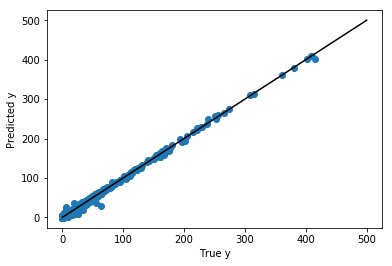

In [26]:
plt.scatter(y_tr,y_pred_tr)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

In [27]:
r2_score(y_tr,y_pred_tr)

0.9939504806681568

In [159]:
bias_tr = (y_tr - y_pred_tr) / df_OCU_tr
#bias_te = (y_te - y_pred_te) / df_OCU_te

In [160]:
SNR_tr = y_tr / df_OCU_tr
SNR_te = y_te / df_OCU_te

Text(0,0.5,'bias')

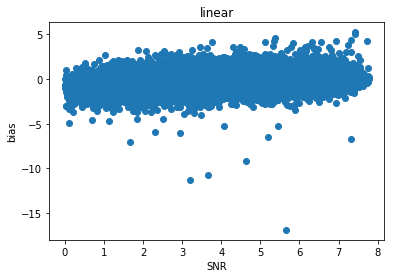

In [162]:
plt.scatter(SNR_tr,bias_tr)
plt.title("linear")
plt.xlabel("SNR")
plt.ylabel("bias")

### Ridge regression

In [31]:
ridge = Ridge()

In [32]:
cross_val_score(ridge,x_tr,y_tr, cv=10)

array([0.95377443, 0.96659408, 0.98123803, 0.9557097 , 0.96215155,
       0.97658692, 0.97252635, 0.9814716 , 0.9707717 , 0.96947386])

In [33]:
ridge.fit(x_tr,y_tr)
y_pred_tr_ridge = ridge.predict(x_tr)
#y_pred_te_ridge = ridge.predict(x_te)

Text(0,0.5,'Predicted y')

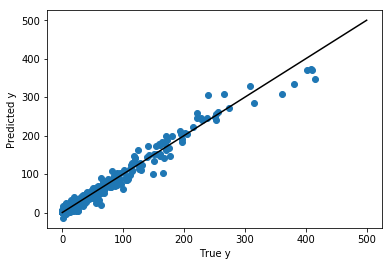

In [34]:
plt.scatter(y_tr,y_pred_tr_ridge)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")


In [35]:
r2_score(y_tr,y_pred_tr_ridge)

0.9754435219744614

Text(0,0.5,'bias')

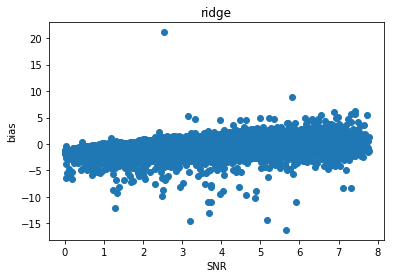

In [36]:
bias_tr_ridge = (y_tr - y_pred_tr_ridge) / df_OCU_tr

plt.scatter(SNR_tr,bias_tr_ridge)
plt.title("ridge")
plt.xlabel("SNR")
plt.ylabel("bias")

### Neural Network

In [37]:
nn = MLPRegressor()

In [38]:
nn.fit(x_tr,y_tr)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [39]:
y_pred_tr_nn = nn.predict(x_tr)

Text(0,0.5,'Predicted y')

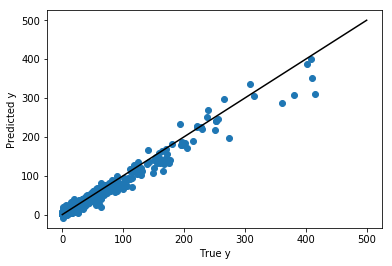

In [40]:
plt.scatter(y_tr,y_pred_tr_nn)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

In [41]:
r2_score(y_tr,y_pred_tr_nn)

0.9638423213083628

Text(0,0.5,'bias')

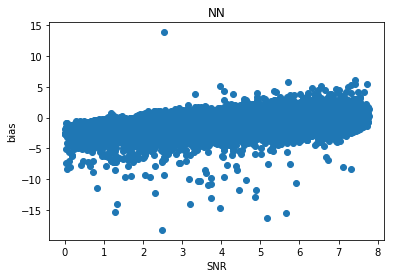

In [42]:
bias_tr_nn = (y_tr - y_pred_tr_nn) / df_OCU_tr

plt.scatter(SNR_tr,bias_tr_nn)
plt.title("NN")
plt.xlabel("SNR")
plt.ylabel("bias")

### 2nd derivative

In [43]:
df_derive = df_derive.T

In [44]:
pd_der_merge = df_OC.merge(df_derive, right_index=True, left_index=True)

In [45]:
df_split.head(9)

,usage
site,
CRLA1_04_21_2015_NM_0_csv,calibration
TONT1_05_09_2015_NM_0_csv,calibration
BADL1_11_26_2015_NM_0_csv,calibration
BRID1_10_27_2015_NM_0_csv,calibration
SEQU1_04_03_2015_NM_0_csv,calibration
PINN1_08_04_2015_NM_QC_0_csv,calibration
BRIS1_12_17_2015_NM_0_csv,calibration
BRCA1_04_15_2015_NM_0_csv,calibration
ORPI1_09_03_2015_FB_0_csv,calibration


In [46]:
pd_der_again = pd_der_merge.merge(df_split, right_index=True, left_index=True)

In [47]:
set_train_der = pd_der_again[pd_der_again["usage"] == "calibration"]

In [48]:
set_test_der = pd_der_again[pd_der_again["usage"] == "test"]

In [49]:
y_tr_der = set_train_der["OCf:Value"]
y_te_der = set_test_der["OCf:Value"]
x_tr_der = set_train_der.drop(["OCf:Value","OCf:Unc","usage"], axis=1)
x_te_der = set_test_der.drop(["OCf:Value","OCf:Unc","usage"], axis=1)

In [50]:
lr.fit(x_tr_der,y_tr_der)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
der_predict_tr = lr.predict(x_tr_der)

Text(0,0.5,'Predicted y')

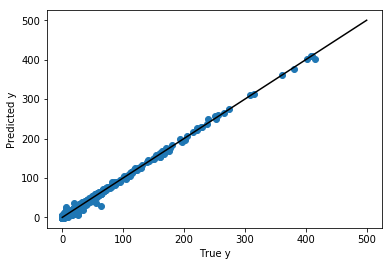

In [52]:
plt.scatter(y_tr,der_predict_tr)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

In [53]:
r2_score(y_tr,der_predict_tr)

0.9938977307958035

In [ ]:
#x_tr_der[x_tr_der.index.contains("_NM_")]

## FEATURE REDUCTION

In [106]:
# Compute PCA keeping only he n_components
pca = PCA(n_components=100)

In [107]:
# fit and transform train set and transform test set
pca_tr = pca.fit_transform(x_tr)
pca_te = pca.transform(x_te)

In [108]:
#fit linear Regression model on PCA data
lr.fit(pca_tr, y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [109]:
y_pred_pca = lr.predict(pca_te)

Text(0,0.5,'Predicted y')

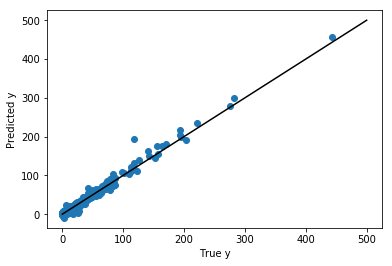

In [110]:
# display plot to see "accuracy" of the model
plt.scatter(y_te,y_pred_pca)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

In [111]:
r2_score(y_te,y_pred_pca)

0.9794986829514511

**Almost as good as the linear model without feature reduction but here only using 100 features =0**

In [125]:
# Check performance of pca models with different number of components
max_pca_feat = 100

def compute_scores(X,y):
    """Compute cross-validation on pca model with different number of components"""
    pca = PCA()
    pca_scores = []
    
    for n_feat in range(1,max_pca_feat):
        pca.n_components = n_feat
        pca_scores.append(np.mean(cross_val_score(pca,X,y, cv=3)))
        print(n_feat)
    return pca_scores

In [ ]:
# trick: Use pickle to avoid recalculating
import pickle

def load_pickle(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

def save_pickle(result, file_path):
    with open(file_path, 'wb') as file:
        pickle.dump(result, file)

def features_computation(X,y):
    try:
        return load_pickle('./pca_cv_scores')
    except (FileNotFoundError, EOFError) as e:
        pca_scores = compute_scores(X,y)
        save_pickle(pca_scores, './pca_cv_scores')
        return pca_scores

In [ ]:
# compute cv_score of pca models with different number of components
pca_scores = features_computation(x_tr,y_tr)

Text(0.5,1,'Number of Features')

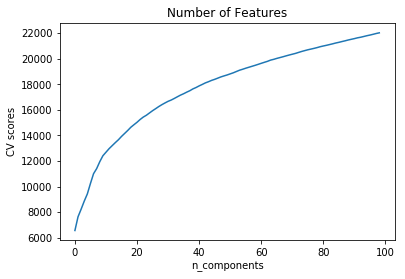

In [132]:
# Display plot to help determine how many features to keep to not lose too much information
plt.plot(pca_scores)
plt.ylabel("CV scores")
plt.xlabel("n_components")
plt.title("Number of Features")

## TRAINING SET REDUCTION

In [135]:
# Check performance of pca models with diff training set size // n_components = 100 determined in the above cell
def compute_min_set(X,y):
    """Compute cross-validation on pca model with different training set size"""
    
    pca = PCA(n_components=100)
    pca_scores = []
    length = X.shape[0]
    k = 50
    div = round(length/k)
    for i in range(k):
        pca_scores.append(np.mean(cross_val_score(pca,X.iloc[:(1+i)*div,:],y[:(1+i)*div], cv=3)))
        print(i)
    return pca_scores

In [ ]:
# compute cv_score of pca model with increasing training set size
min_set_score = compute_min_set(x_tr,y_tr)

Text(0.5,1,'Training set size')

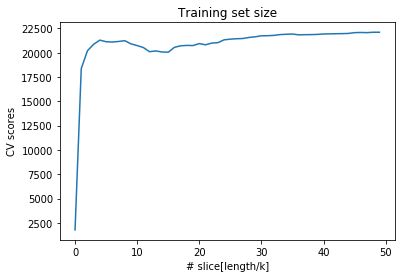

In [138]:
# Display plot
plt.plot(min_set_score)
plt.ylabel("CV scores")
plt.xlabel("# slice[length/k]")
plt.title("Training set size")

In [142]:
# index of the highest to the lowest values
np.argsort(min_set_score)[::-1]

array([49, 48, 46, 47, 45, 44, 43, 42, 41, 40, 35, 34, 39, 33, 38, 37, 36,
       32, 31, 30, 29, 28, 27, 26, 25, 24,  4,  8,  7,  5,  6, 23, 22, 20,
        9,  3, 21, 18, 19, 10, 17, 16, 11,  2, 13, 12, 14, 15,  1,  0])

**We can see that, we could take only ~ 8/50 of the train set to get almost the same performance**

0.9753502671097396

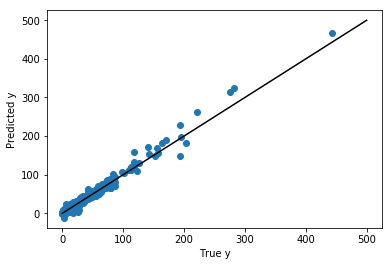

In [155]:
# Test what we found 
pca = PCA(n_components=100)
k = 50
length = x_tr.shape[0]
div = round(length/k)
slices = 8
ind = round(slices*div)
x_train = x_tr.iloc[:ind,:]
y_train = y_tr[:ind]

pca_train = pca.fit_transform(x_train)
pca_test = pca.transform(x_te)

lr.fit(pca_train, y_train)

y_pred_pca = lr.predict(pca_test)

plt.scatter(y_te,y_pred_pca)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

r2_score(y_te,y_pred_pca)

Text(0,0.5,'bias')

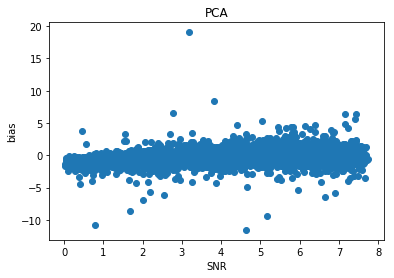

In [163]:
bias_test = (y_te - y_pred_pca) / df_OCU_te

plt.scatter(SNR_te,bias_test)
plt.title("PCA")
plt.xlabel("SNR")
plt.ylabel("bias")